In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [45]:
df = pd.read_csv('data/vehicles.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [47]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [48]:
df.drop(index = df.loc[df['price'] <= 500].index, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383765 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            383765 non-null  int64  
 1   region        383765 non-null  object 
 2   price         383765 non-null  int64  
 3   year          382593 non-null  float64
 4   manufacturer  368371 non-null  object 
 5   model         379230 non-null  object 
 6   condition     238716 non-null  object 
 7   cylinders     227334 non-null  object 
 8   fuel          381172 non-null  object 
 9   odometer      381644 non-null  float64
 10  title_status  376779 non-null  object 
 11  transmission  381947 non-null  object 
 12  VIN           235700 non-null  object 
 13  drive         267229 non-null  object 
 14  size          108063 non-null  object 
 15  type          301288 non-null  object 
 16  paint_color   272771 non-null  object 
 17  state         383765 non-null  object 
dtypes: float6

In [50]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [51]:
df['odometer'].fillna(df['odometer'].median(), inplace=True)

In [52]:
df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)

In [53]:
df['condition'].fillna(value='unknown', inplace=True)

In [54]:
df['type'].fillna(value='unknown', inplace=True)

In [55]:
df['transmission'].fillna(value='unknown', inplace=True)

In [56]:
df['title_status'].fillna(value='unknown', inplace=True)

In [57]:
df['drive'].fillna(value='unknown', inplace=True)

In [58]:
df['model'].fillna(value='unknown', inplace=True)

In [59]:
#df['year'].dropna(inplace=True)

In [60]:
df['fuel'].fillna(value='unknown', inplace=True)

In [61]:
df['size'].fillna(value='unknown', inplace=True)

In [62]:
df['cylinders'].fillna(value='unknown', inplace=True)

In [63]:
#df['condition'].fillna(value='unknown', inplace=True)

In [64]:
df.drop(columns=['VIN'], inplace=True)

In [65]:
df['paint_color'].fillna(value='unknown', inplace=True)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
q1 = df['price'].quantile(.25)
q3 = df['price'].quantile(.75)

IQR = q3 - q1

df = df[(df['price'] >= (q1 - 1.5 * IQR)) & (df['price'] <= (q3 + 1.5 * IQR))]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375974 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            375974 non-null  int64  
 1   region        375974 non-null  object 
 2   price         375974 non-null  int64  
 3   year          374987 non-null  float64
 4   manufacturer  375974 non-null  object 
 5   model         375974 non-null  object 
 6   condition     375974 non-null  object 
 7   cylinders     375974 non-null  object 
 8   fuel          375974 non-null  object 
 9   odometer      375974 non-null  float64
 10  title_status  375974 non-null  object 
 11  transmission  375974 non-null  object 
 12  drive         375974 non-null  object 
 13  size          375974 non-null  object 
 14  type          375974 non-null  object 
 15  paint_color   375974 non-null  object 
 16  state         375974 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 51.

In [69]:
df.isnull().sum()

id                0
region            0
price             0
year            987
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
state             0
dtype: int64

In [70]:
df.dropna(axis = 0, inplace=True)

In [71]:
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [72]:
df_cylinder = df.groupby(['cylinders'])[['price']].value_counts()

In [73]:
df_cylinder = df_cylinder.reset_index()

In [74]:
df_cylinder

,cylinders,price,count
0,10 cylinders,24990,28
1,10 cylinders,22990,28
2,10 cylinders,30990,27
3,10 cylinders,35990,27
4,10 cylinders,22950,23
...,...,...,...
24465,unknown,657,1
24466,unknown,640,1
24467,unknown,646,1
24468,unknown,651,1


<Axes: xlabel='cylinders', ylabel='price'>

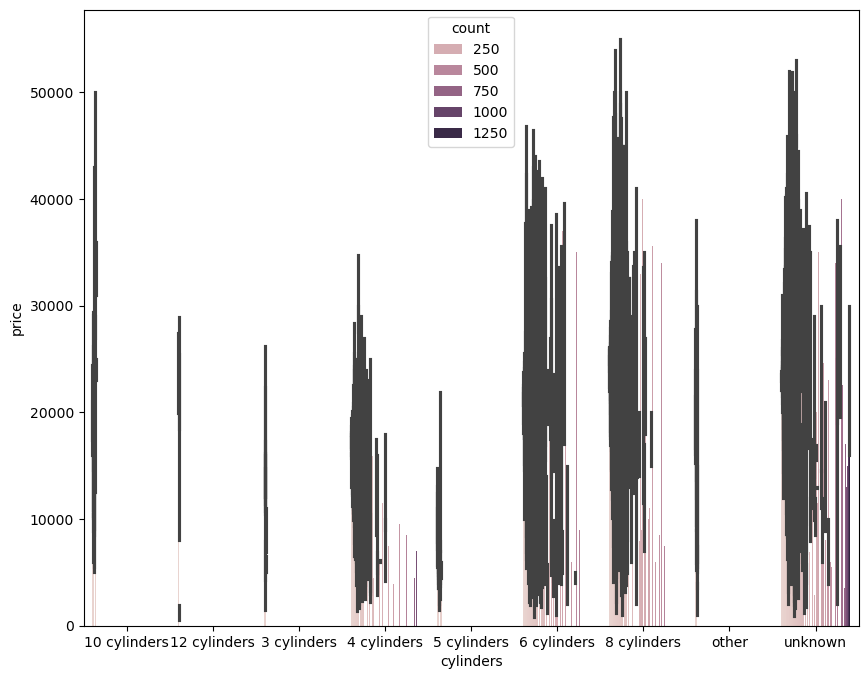

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(df_cylinder, x = 'cylinders', y='price', hue='count')

In [76]:
plt.figure(figsize=(10,8))
px.bar(df_cylinder, x = 'cylinders', y='price', color='count')
plt.show()

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 24470 artists>

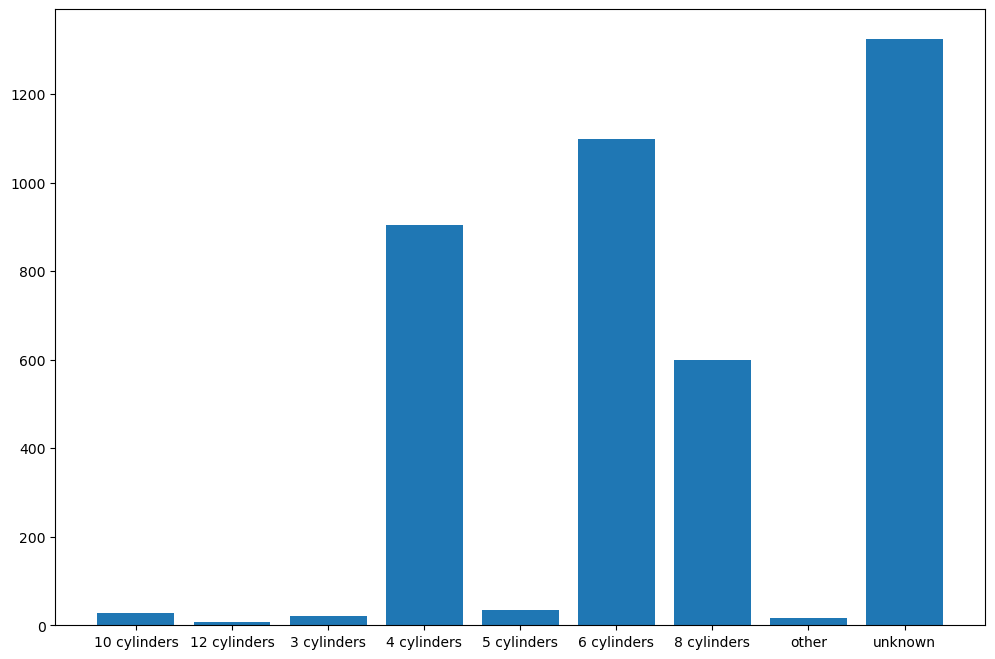

In [77]:
plt.figure(figsize=(12,8))
plt.bar(df_cylinder['cylinders'], height=df_cylinder['count'])

<BarContainer object of 24470 artists>

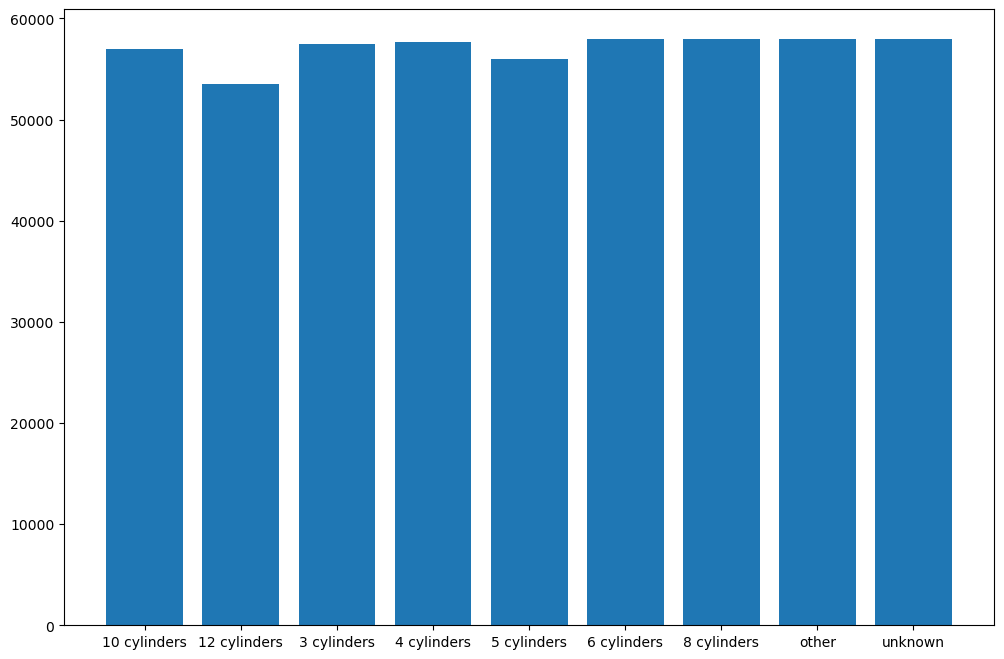

In [78]:
plt.figure(figsize=(12,8))
plt.bar(df_cylinder['cylinders'], height=df_cylinder['price'])

In [79]:
# Findings: Cylinder matters alot

In [80]:
df_cylinder_temp = df.query('(cylinders != "unknown") & (cylinders != "other")')

In [81]:
df_cylinder_temp = df_cylinder_temp.replace({'cylinders' : {'5 cylinders' : 5, '4 cylinders' : 4, '3 cylinders' : 3, '8 cylinders' : 8, '6 cylinders' : 6, '10 cylinders' : 10, '12 cylinders' : 12}})

In [82]:
df_cylinder_temp['cylinders'] = pd.to_numeric(df_cylinder_temp['cylinders'])

In [113]:
df_cylinder_temp.query('(cylinders == 3) & (condition == "excellent")')['price'].max()

57500

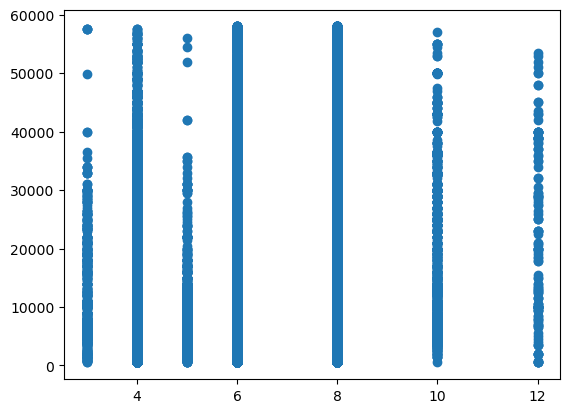

In [84]:
plt.scatter(df_cylinder_temp['cylinders'],  y=df_cylinder_temp['price'])

In [87]:
df_condition = df.groupby('condition')[['price']].sum()

In [89]:
df_condition_count = df.groupby('condition')[['price']].value_counts()

In [91]:
df_condition_count = df_condition_count.reset_index()

In [92]:
df_condition_count

,condition,price,count
0,excellent,7995,1059
1,excellent,9995,927
2,excellent,6995,918
3,excellent,8995,885
4,excellent,6500,864
...,...,...,...
22457,unknown,15570,1
22458,unknown,15575,1
22459,unknown,15578,1
22460,unknown,15591,1


<BarContainer object of 22462 artists>

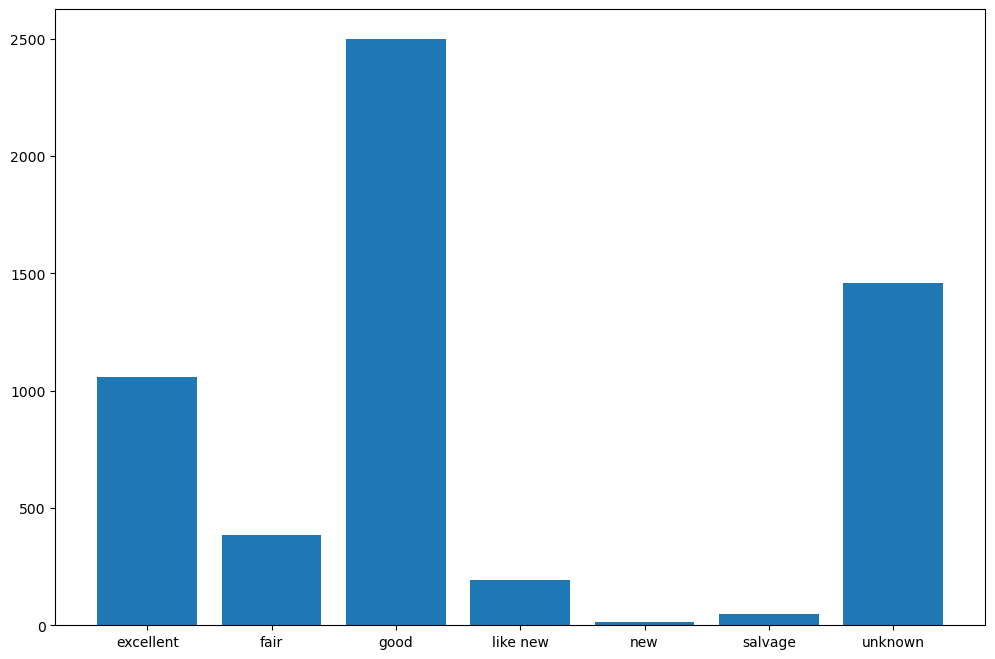

In [94]:
plt.figure(figsize=(12,8))
plt.bar(df_condition_count['condition'], height=df_condition_count['count'])

<BarContainer object of 22462 artists>

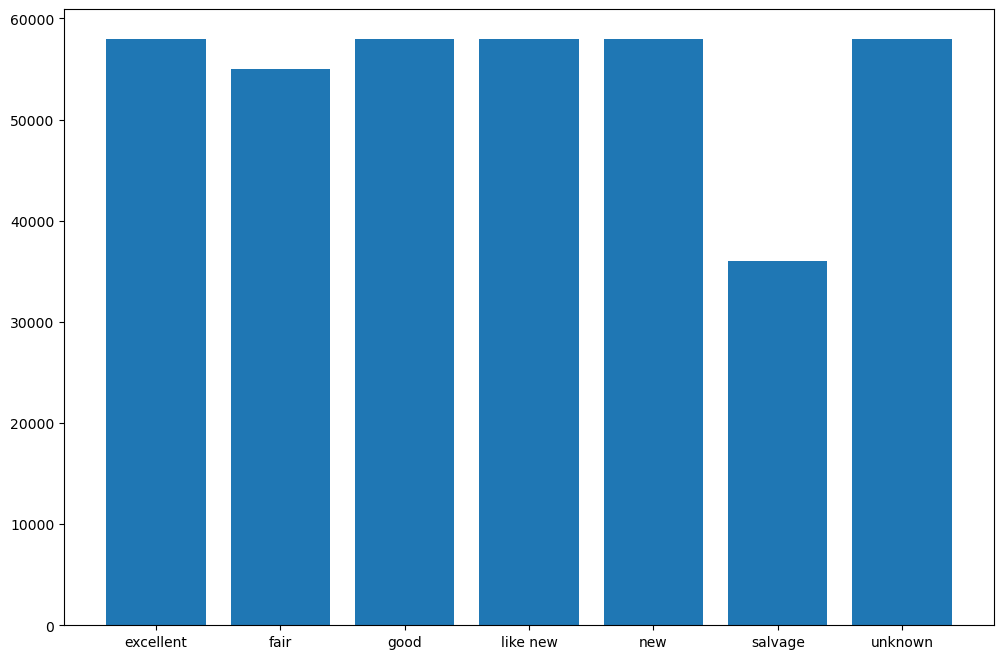

In [95]:
plt.figure(figsize=(12,8))
plt.bar(df_condition_count['condition'], height=df_condition_count['price'])

In [ ]:
df_size = df.groupby('size')[['price']].sum()

In [ ]:
df_year = df.groupby('year')[['price']].sum()

In [ ]:
df_transmission = df.groupby('transmission')[['price']].sum()

In [ ]:
df_model = df.groupby('model')[['price']].sum()

In [ ]:
df_drive = df.groupby('drive')[['price']].sum()

In [ ]:
df_cylinder = df_cylinder.reset_index()

In [ ]:
df_cylinder

In [ ]:
df_cylinder.plot()

In [ ]:
df.isnull().sum()